In [1]:
from segment_mapping import *
from plpygis import Geometry
import shapely.geometry as sg
import shapely.ops as so
import matplotlib.pyplot as plt
from apperception.utils import fetch_camera_config
import cv2
# importing movie py libraries
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

In [2]:
test_config = fetch_camera_config('samples/CAM_FRONT/n008-2018-08-27-11-48-51-0400__CAM_FRONT__1535385105912404.jpg', database)

In [3]:
test_config

{'cameraId': 'scene-0655',
 'egoTranslation': [1882.886, 869.0899, 0.0],
 'egoRotation': [0.999778, -0.018495532, 0.0014230475, 0.009995558],
 'cameraTranslation': [1.7220057, 0.004754533, 1.4949129],
 'cameraTranslationAbs': [1884.6113, 869.1843, 1.4881718],
 'cameraRotation': [0.50772417, -0.49733922, 0.49837166, -0.4964832],
 'cameraIntrinsic': [[1252.8131, 0.0, 826.58813],
  [0.0, 1252.8131, 469.98465],
  [0.0, 0.0, 1.0]],
 'frameNum': 2184,
 'fileName': 'samples/CAM_FRONT/n008-2018-08-27-11-48-51-0400__CAM_FRONT__1535385105912404.jpg',
 'cameraHeading': -88.263855,
 'egoHeading': -88.85175}

In [4]:
mapping = map_imgsegment_roadsegment(test_config)

construct_search_space time:  0.008238554000854492
total_decode_segment_time:  0.05995631217956543
total intersection compute time 0.013184785842895508
avg intersection compute time 8.344801166389562e-05
total mapping time:  0.2686500549316406
avg mapping time:  0.001700316803364814
total time:  0.35213351249694824


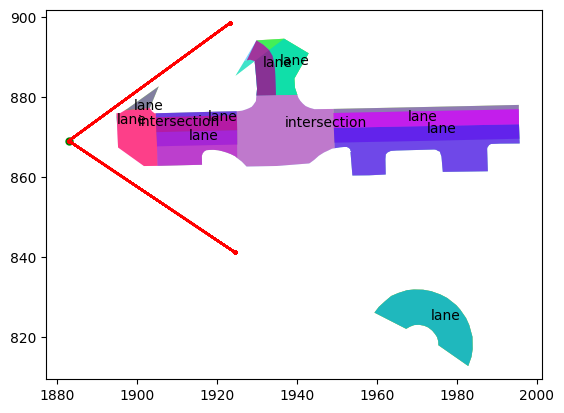

In [6]:
test_file_path = '/home/yongming/workspace/research/apperception/v1.0-mini/samples/CAM_FRONT/n008-2018-08-27-11-48-51-0400__CAM_FRONT__1535385105912404.jpg'
frame = cv2.imread(test_file_path)
fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')
x_ego, y_ego = test_config['egoTranslation'][:2]
axs.plot(x_ego, y_ego, color='green', marker='o', markersize=5)
colormap = plt.cm.get_cmap('hsv', len(mapping))
i = 0
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
display_video = cv2.VideoWriter('in_videw_display.avi',fourcc, 1, (1600, 900))
for cam_segment, road_segment_info in mapping:
    color = colormap(i)
    xs = [point[0] for point in road_segment_info.segment_polygon]
    ys = [point[1] for point in road_segment_info.segment_polygon]
    segmenttype = road_segment_info.segment_type
    axs.fill(xs, ys, alpha=0.5, fc=color, ec='none')
    axs.text(np.mean(np.array(xs)), np.mean(np.array(ys)), 
             ','.join(segmenttype) if segmenttype and ('lane' in segmenttype or 'intersection' in segmenttype) else '')
    current_plt = mplfig_to_npimage(fig)
    i += 1
    
    fov_lines = road_segment_info.fov_lines
    axs.plot([p[0] for p in fov_lines[0]], [p[1] for p in fov_lines[0]], color='red', marker='o', markersize=2)
    axs.plot([p[0] for p in fov_lines[1]], [p[1] for p in fov_lines[1]], color='red', marker='o', markersize=2)

    
    display_frame = frame.copy()
    cv2.polylines(display_frame, [np.array(cam_segment, np.int32).reshape((-1, 1, 2))], True, (0, 255, 0), 2)
    display_frame[:current_plt.shape[0], :current_plt.shape[1]] = current_plt
    display_video.write(display_frame)
#     cv2.imshow("frame",display_frame)
#     cv2.waitKey(0) 
#     cv2.destroyAllWindows()
display_video.release()
plt.show()

In [5]:
all_segment_within_distance = construct_search_space(test_config)

POINT Z (1882.8860398360027 869.0899211762962 0)


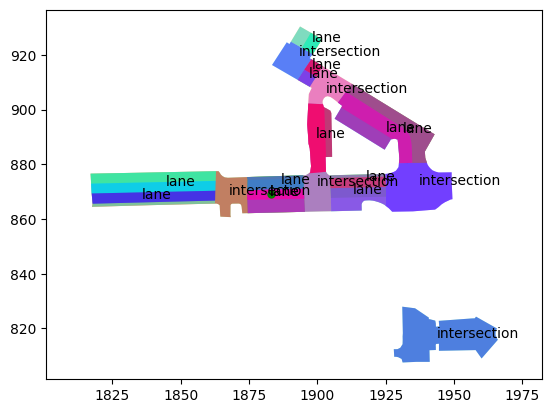

In [6]:
import numpy as np
BLUE = '#6699cc'
GRAY = '#999999'

fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')
ego_translation = Geometry(test_config['egoTranslation'].values[0])
x_ego, y_ego = ego_translation.shapely.xy
print(ego_translation.shapely)
axs.plot(x_ego, y_ego, color='green', marker='o', markersize=5)

colormap = plt.cm.get_cmap('hsv', len(all_segment_within_distance))
i = 0
for segmentid, segmentpolygon, segmenttype, _ in all_segment_within_distance:
    color = colormap(i)
    xs, ys = Geometry(segmentpolygon).shapely.exterior.xy
    axs.fill(xs, ys, alpha=0.5, fc=color, ec='none')
    axs.text(np.mean(np.array(xs)), np.mean(np.array(ys)), 
             ','.join(segmenttype) if segmenttype and ('lane' in segmenttype or 'intersection' in segmenttype) else '')
    i += 1
plt.show()

In [7]:
fov_lines = get_fov_lines(test_config)

In [12]:
from sympy import Polygon, Line
test_segmentpolygon = list(map(Point, tuple(zip(*Geometry(segmentpolygon).exterior.shapely.xy))))
print(*test_segmentpolygon)
test_segmentpolygon = Polygon(*test_segmentpolygon)

Point2D(47381201259933/25000000000, 28583677404579/31250000000) Point2D(9489105228613/5000000000, 36738350152663/40000000000) Point2D(95096758259089/50000000000, 915913084556613/1000000000000) Point2D(189958763185183/100000000000, 182419570151881/200000000000) Point2D(47381201259933/25000000000, 28583677404579/31250000000)


In [ ]:
fov_lines

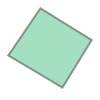

In [11]:
test_segmentpolygon

In [ ]:
intersection(fov_lines, test_segmentpolygon)